## World Airports

Cluster based on latitude and longitude

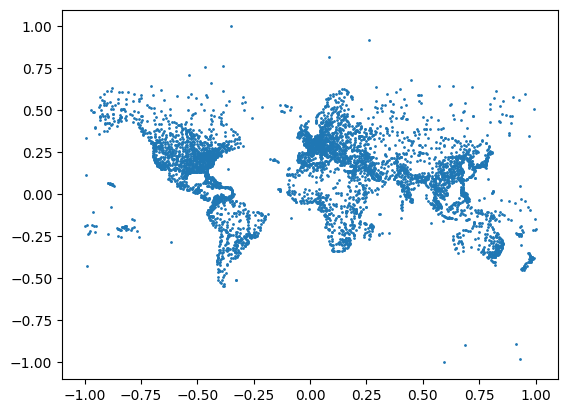

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

airports = pd.read_csv("datasets/World_Airports.csv")
airports = airports[(airports["type"] == "large_airport") | (airports["type"] == "medium_airport")][["X", "Y"]]


scaler = MinMaxScaler((-1,1))
normalised_dataset = scaler.fit_transform(airports)

plt.scatter(x=normalised_dataset[:, 0], y=normalised_dataset[:, 1], s=1)

def min_squared_distance(centers: np.ndarray, point: np.ndarray):
    return np.min(np.sum((lambda c: (point - c)**2)(centers), axis=1))

def normalised_k_means_loss(centers: np.ndarray, datapoints: np.ndarray):
    # for each point, calculate the squared distance to all centers
    # take the minimum
    # average over all points 
    return np.mean(np.apply_along_axis(lambda row: min_squared_distance(centers, row), axis=1, arr=datapoints))


In [2]:
len(normalised_dataset)

5211

K Means Loss for k=2 is 0.11181473328178074
K Means Loss for k=3 is 0.06560240358715082
K Means Loss for k=4 is 0.06567534340368196
K Means Loss for k=5 is 0.06746639438557228
K Means Loss for k=6 is 0.07962414960805753
K Means Loss for k=7 is 0.05974429525273231


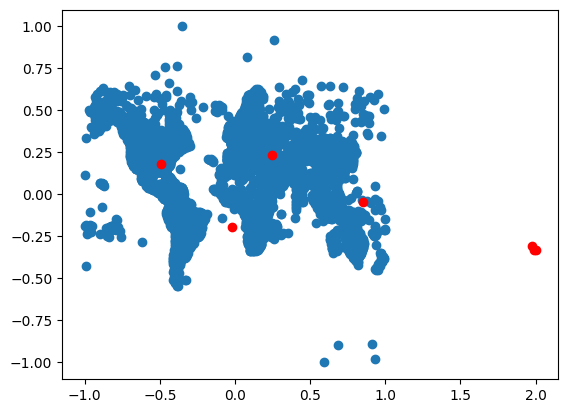

In [ ]:
from lloyd import dplloyd, PrivacyBudget

p = PrivacyBudget(1, 0.0001, "dichotomy", total_iter=10)
for k in range(2,8):
    centers=dplloyd(k, pd.DataFrame(normalised_dataset), 10, p)
    print(f"K Means Loss for k={k} is {normalised_k_means_loss(centers, normalised_dataset)}")

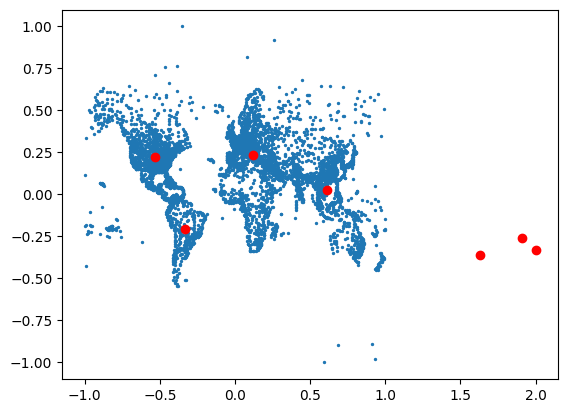

In [28]:
centers=dplloyd(7, pd.DataFrame(normalised_dataset), 3, p)
plt.scatter(x=normalised_dataset[:,0], y=normalised_dataset[:,1], s=2)
plt.scatter(x=centers[0], y=centers[1], color="red")

In [ ]:
def assign_points_to_clusters(points, centers):
    """
    points:  (N, D) array of N datapoints in D dimensions
    centers: (K, D) array of K cluster centers in D dimensions
    
    returns: (N,) array with the index of the closest center for each point
    """
    # Compute squared distances between all points and all centers
    # points[:, None, :] -> shape (N, 1, D)
    # centers[None, :, :] -> shape (1, K, D)
    # broadcasting yields (N, K, D)
    squared_distances = np.sum((points[:, None, :] - centers[None, :, :])**2, axis=2)
    
    # For each point, pick the center with minimum squared distance
    assignments = np.argmin(squared_distances, axis=1)
    
    return assignments


def color_clusters(datapoints, centers, colors):
    assignments = assign_points_to_clusters(datapoints, centers)
    for i in range(len(centers)):
        plt.scatter(x=datapoints[])